### CREAMOS UN DATAFRAME A PARTIR DE UN CSV EN GITHUB

In [18]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd

plt.style.use('ggplot')

"""definimos variable en base a una url que contiene un archivo csv alojado en github
    luego usamos la función read_ccsv() de panda para leer el archivov y cargarlo en un dataframe (df)
"""

download_url = ("https://raw.githubusercontent.com/fivethirtyeight/data/master/college-majors/recent-grads.csv") 
df = pd.read_csv(download_url)
type(df)


pandas.core.frame.DataFrame

### VISUALIZAMOS EL DF

In [28]:
pd.set_option("display.max.columns", None) #1ro seteamos que panda NO oculte columnas

df.head() # echamos un vistazo a las 1ras 5 columnas

#The default number of rows displayed by head() is five, but you can specify any number of rows as an argument. 
#For example, to display the first ten rows, you would use df.head(10)


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,1849,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,556,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,558,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,1069,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,23170,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


### Creamos un gráfico

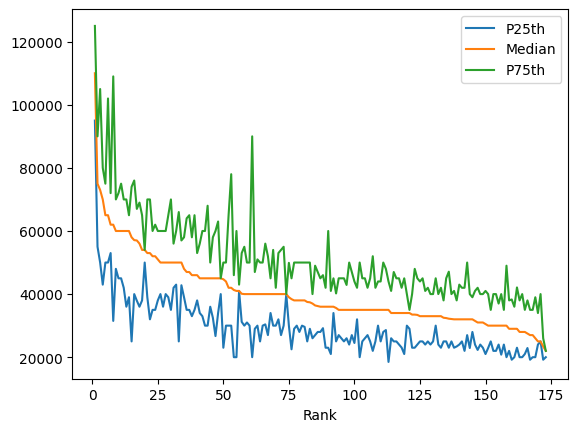

In [11]:
import matplotlib.pyplot as plt
df.plot(x="Rank", y=["P25th", "Median", "P75th"])
plt.show()

<Axes: xlabel='Rank'>

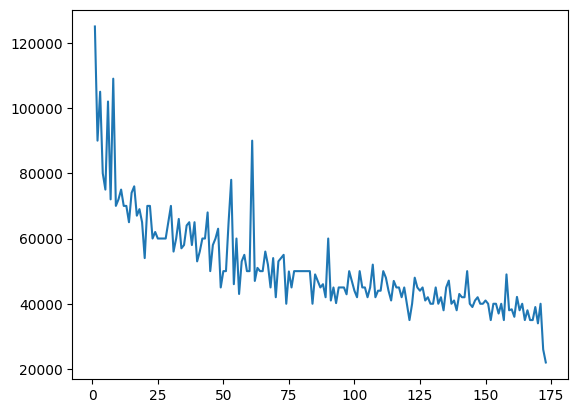

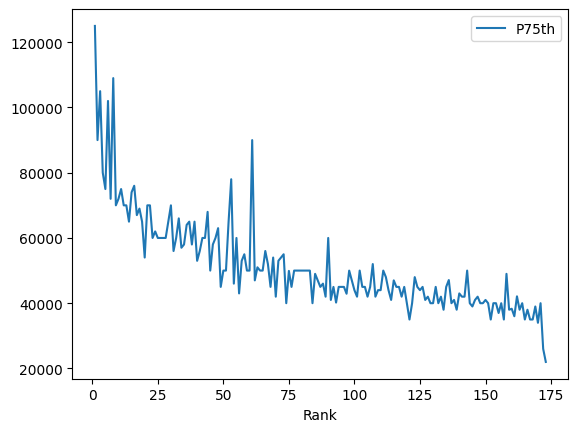

In [13]:
#se pueden crear las mismas visualizaciones con 2 formas diferentes:

plt.plot(df["Rank"], df["P75th"]) #estilo Pyplot 

df.plot(x="Rank", y="P75th") #estilo O-O object-oriented

<Axes: ylabel='Frequency'>

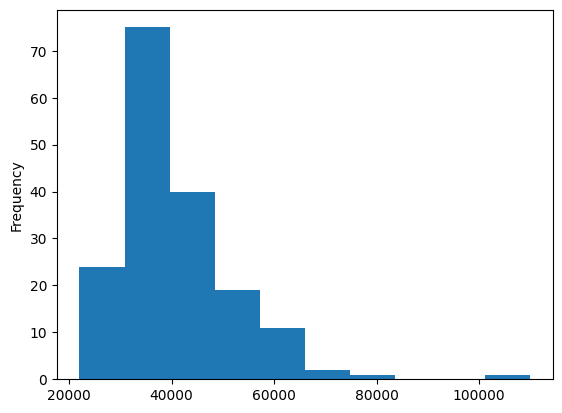

In [16]:
median_column = df["Median"]

median_column.plot(kind="hist")

#The histogram has a different shape than the normal distribution, which has a symmetric bell shape with a peak in the middle.
#The histogram of the median data, however, peaks on the left below $40,000. 
#The tail stretches far to the right and suggests that there are indeed fields whose majors can expect significantly higher earnings.

### OUTLIERS

<Axes: xlabel='Major'>

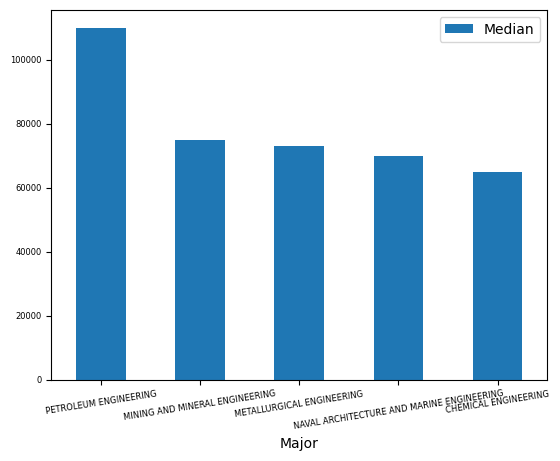

In [27]:
top_5 = df.sort_values(by="Median", ascending=False).head() #creamos una nueva variable a partir del df, lo ordenamos por media desc y llamamos head() (top 5)
top_5.plot(x="Major", y="Median", kind="bar", rot=9, fontsize=6) #rot es text rotation

<Axes: xlabel='Major'>

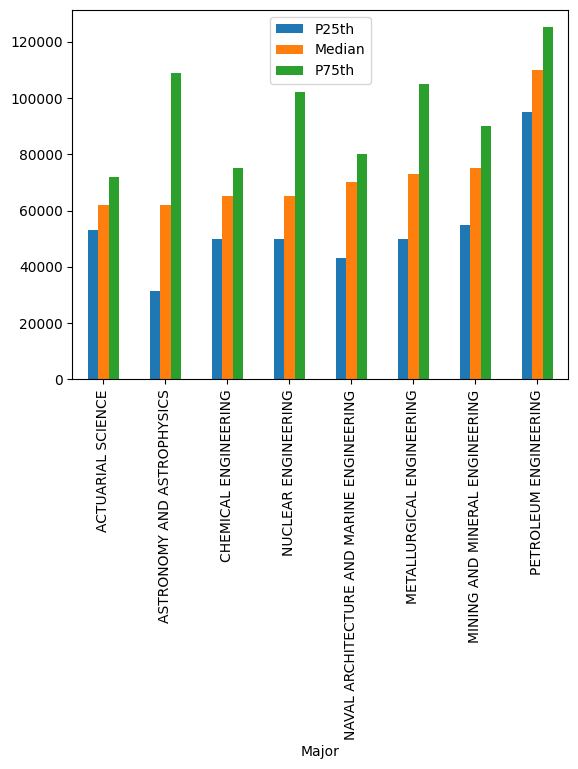

In [28]:
top_medians = df[df["Median"] > 60000].sort_values("Median")
top_medians.plot(x="Major", y=["P25th", "Median", "P75th"], kind="bar")

### BUSCAMOS CORRELACIÓN

<Axes: xlabel='Median', ylabel='Unemployment_rate'>

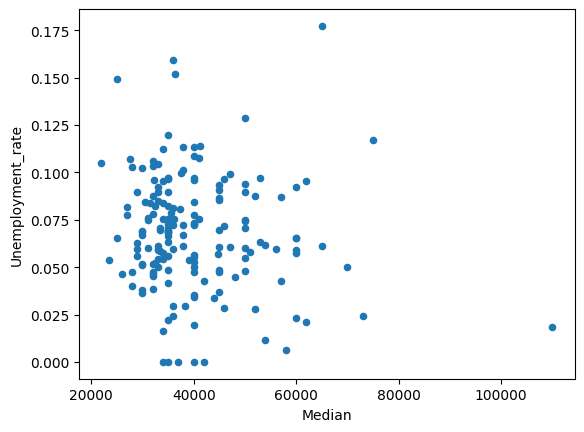

In [29]:
df.plot(x="Median", y="Unemployment_rate", kind="scatter")

### AGRUPAMOS

In [32]:
#agrupamos df por major category, miramos la columna total y la sumamos para cada grupo, ordenamos asc por defecto
cat_totals = df.groupby("Major_category")["Total"].sum().sort_values() 
cat_totals

#With .groupby(), you create a DataFrameGroupBy object. With .sum(), you create a Series.


Major_category
Interdisciplinary                        12296.0
Agriculture & Natural Resources          75620.0
Law & Public Policy                     179107.0
Physical Sciences                       185479.0
Industrial Arts & Consumer Services     229792.0
Computers & Mathematics                 299008.0
Arts                                    357130.0
Communications & Journalism             392601.0
Biology & Life Science                  453862.0
Health                                  463230.0
Psychology & Social Work                481007.0
Social Science                          529966.0
Engineering                             537583.0
Education                               559129.0
Humanities & Liberal Arts               713468.0
Business                               1302376.0
Name: Total, dtype: float64

### Si queremos averiguar más sobre un método podemos usar HELP()

In [16]:
help(df.head)

Help on method head in module pandas.core.generic:

head(n: 'int' = 5) -> 'Self' method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.

    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.

    For negative values of `n`, this function returns all rows except
    the last `|n|` rows, equivalent to ``df[:n]``.

    If n is larger than the number of rows, this function returns all rows.

    Parameters
    ----------
    n : int, default 5
        Number of rows to select.

    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.

    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.

    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0

### Gráfico de barras horizontal -> Totales por Categoría

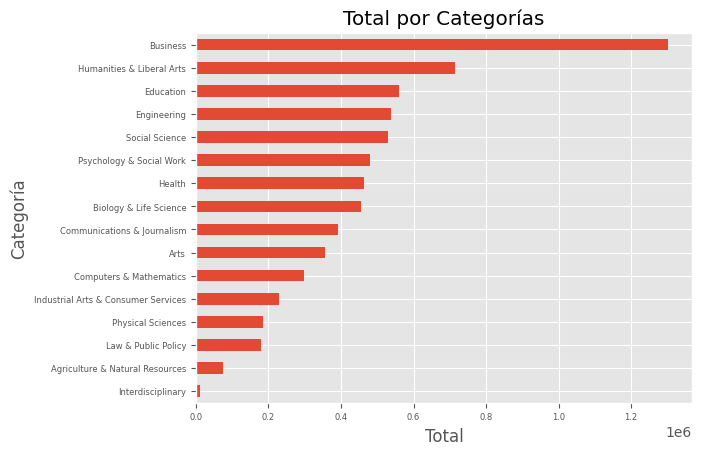

In [35]:
cat_totals.plot(kind="barh", fontsize=6)
plt.title("Total por Categorías") # Añadimos título al gráfico
plt.xlabel("Total") # Nombre del eje x
plt.ylabel("Categoría") # Nombre del eje y
plt.show() # Mostrar el gráfico

### Determinamos Ratios

Text(0.5, 1.0, 'Participación de Categorías Grandes')

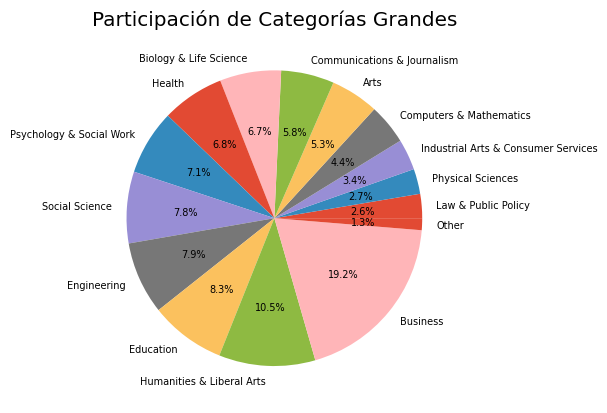

In [44]:
#Since cat_totals contains a few smaller categories, creating a pie plot with cat_totals.plot(kind="pie") will produce several tiny slices with overlapping labels .
#To address this problem, we can lump the smaller categories into a single group. Merge all categories with a total under 100,000 into a category called "Other", then create a pie plot:

small_cat_totals = cat_totals[cat_totals < 100_000] #creamos una categoría para agrupar las más pequeñas
big_cat_totals = cat_totals[cat_totals > 100_000]

small_sums = pd.Series([small_cat_totals.sum()], index=["Other"])
big_cat_totals = pd.concat([big_cat_totals, small_sums])

# Calculamos el tamaño de cada porción en porcentaje
porcentajes = 100 * big_cat_totals / big_cat_totals.sum()

big_cat_totals.plot(kind="pie", autopct='%1.1f%%', fontsize=7, label="")

plt.title("Participación de Categorías Grandes")

### Ejemplo si queremos enfocarnos en una sola categoría

<Axes: ylabel='Frequency'>

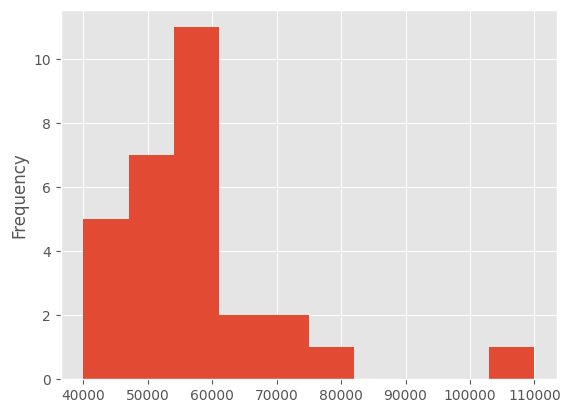

In [46]:
#por ejemplo nos enfocamos sólo en la categoría Ingeniería:

df[df["Major_category"] == "Engineering"]["Median"].plot(kind="hist")